In [1]:
import struct
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl

In [2]:
def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """
    with open('../../data/raw/train-labels-idx1-ubyte', 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open('../../data/raw/train-images-idx3-ubyte', 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

In [3]:
def show(image):
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

def ascii_show(image):
    for y in image:
        row = ""
        for x in y:
            row += '{:02X}'.format(x)+' '
        print(row)

### 1. Increase the size of first five picture into 30x30. Use Gx and Gy Matrix to generate 10 pictures

In [4]:
# Pad out the original image.
def padding_30(img):
    result = np.zeros([30,30])
    for i in range(28):
        for j in range(28):
            result[i+1,j+1] = img[i,j]
    return result

In [5]:
Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [6]:
# load data
training_data = list(read(dataset='traing',path=''))

In [7]:
# Filter the image by Gx and Gy
def Gx_Fc(number):
    New_img_list = []
    for i in range(number):
        New_img = np.zeros([28,28])
        label, pixel = training_data[i]
        img = padding_30(pixel)
        for j in range(pixel.shape[0]):
            for k in range(pixel.shape[1]):
                New_img[j,k] = sum(sum(np.multiply(img[j:j+3,k:k+3],Gx)))/(3*3)
        New_img_list.append(New_img)
    show_list(New_img_list)

def Gy_Fc(number):
    New_img_list = []
    for i in range(number):
        New_img = np.zeros([28,28])
        label, pixel = training_data[i]
        img = padding_30(pixel)
        for j in range(pixel.shape[0]):
            for k in range(pixel.shape[1]):
                New_img[j,k] = sum(sum(np.multiply(img[j:j+3,k:k+3],Gy)))/(3*3)
        New_img_list.append(New_img)
    show_list(New_img_list)
        
def show_list(image):
    fig = pyplot.figure()
    L = len(image)
    for i in range(L):
        ax = fig.add_subplot(1,L,i+1)
        imgplot = ax.imshow(image[i], cmap=mpl.cm.Greys)
    pyplot.show()

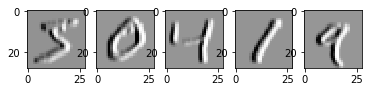

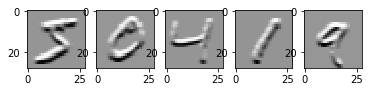

In [8]:
Gx_Fc(5)
Gy_Fc(5)

## 2. Increase the size of  the first image in the dataset to 32x32, 34x34, 36x36. Then, use 5x5, 7x7 and 9x9 filter to modify it.

In [9]:
# To generate 32x32, 34x34, 36x36 image
def padding_32_34_36(img):
    result1 = np.zeros([32,32])
    result2 = np.zeros([34,34])
    result3 = np.zeros([36,36])
    
    for i in range(28):
        for j in range(28):
            p = img[i,j]
            result1[i+2,j+2] = p
            result2[i+3,j+3] = p
            result3[i+4,j+4] = p
    return result1, result2, result3

In [10]:
# To make filter
def make_filter(size):
    Filter = np.zeros([size,size])
    half = int(size/2)
    for j in range(half):
        for i in range(half+1):
            Filter[i,j] = half+i-j
    count = 1
    for i in range(half+1,size):
        for j in range(half):
            Filter[i,j] = Filter[i-2*count,j]
        count+=1
    count = 1  
    for j in range(half+1,size):
        for i in range(size):
            Filter[i,j] = -Filter[i,j-2*count]
        count+=1
    return Filter

In [11]:
# Use filter on image
def Filter_Fc(img,filters):
    New_img = np.zeros([28,28])
    subsize = filters.shape[0]
    for j in range(New_img.shape[0]):
        for k in range(New_img.shape[1]):
            New_img[j,k] = sum(sum(np.multiply(img[j:j+subsize,k:k+subsize],filters)))/(subsize*subsize)
    show(New_img)
    ascii_show(New_img.astype(np.uint8)) 

----------5x5 filter on 32x32----------


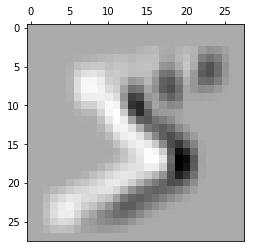

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 FF FE FE F7 F3 EF FE 01 F7 F2 F5 12 1E 18 0A 00 00 
00 00 00 00 00 00 FE FC F8 F2 F0 EA EC F2 EB EA E6 02 07 F3 E5 F9 39 4D 39 14 00 00 
00 00 00 00 00 FD E8 DC D6 D8 E5 DD E0 E9 E3 E1 E9 18 21 FE DD 00 5F 79 56 1C 00 00 
00 00 00 00 00 F9 C9 A9 A1 B2 D7 D2 DC EB E8 E9 09 45 4D 1C EA 12 6A 7A 53 19 00 00 
00 00 00 00 00 F6 AF 75 71 92 CE D5 F4 16 0B F3 19 63 71 3F FB 18 52 58 3B 11 00 00 
00 00 00 00 00 F8 AF 6E 6A 81 B3 CA 0A 4E 44 07 23 67 7B 51 08 18 29 25 16 05 00 00 
00 00 00 00 00 FA C3 8F 8E 87 91 B1 1E 8E 82 1C 0F 42 5E 45 05 08 08 06 03 00 00 00 
00 00 00 00 00 FF E5 C8 C8 A1 6F 7E 08 9B A7 3E 08 1B 2E 25 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 FA EF F0 C1 72 5A D1 6F A6 68 1B 12 12 0C 00 00

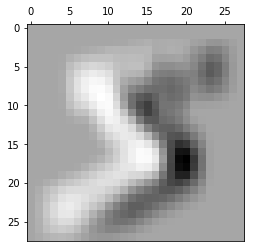

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 FF FF FE F8 F3 EF F7 F6 F3 F4 F9 04 0A 19 1C 14 07 00 
00 00 00 00 00 FF FD F9 F2 EE E7 E6 E7 E5 E4 E3 F8 F6 F2 F3 FF 18 2A 44 41 2A 0E 00 
00 00 00 00 FD ED E2 D7 CF CE CF D9 DD DB DC E4 04 08 05 04 0D 29 46 68 5D 39 12 00 
00 00 00 00 FB D9 BC A6 9C A3 B0 CF D8 D5 D5 ED 1E 28 29 21 20 36 5D 87 76 47 16 00 
00 00 00 00 FA C9 99 76 61 6C 87 C5 E1 E7 EB 0C 3E 47 4C 42 3E 42 67 8B 75 45 14 00 
00 00 00 00 F9 BD 80 54 35 3F 6B C5 F7 0A 15 35 57 62 6A 5D 4F 3F 59 73 60 39 10 00 
00 00 00 00 F9 BD 7D 50 24 1E 49 BB 0A 35 4B 64 6B 67 72 66 54 33 42 54 47 2C 0D 00 
00 00 00 00 FB C7 8E 6A 36 13 27 A3 12 61 89 9C 7D 5E 6A 63 4F 21 26 29 1F 11 03 00 
00 00 00 00 FC D5 AB 97 65 2E 23 8B 01 64 A4 BB 8E 5A 59 4F 35 09 09 08 05 02 00 00 
00 00 00 00 FF EC D5 CB 9E 57 2A 65 C9 30 8D B8 9A 60 53 43 23 01

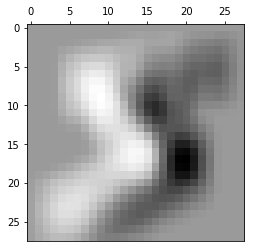

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 FF FF FE F9 F4 F0 F5 F3 EF ED F4 01 09 0F 10 19 18 10 06 
00 00 00 00 FF FE FA F4 EF E8 E4 E3 DF DD DE EC ED EC EC FB 13 23 2F 33 3E 35 21 0B 
00 00 00 FE F1 E6 DB D1 CB C5 C5 CE D3 D2 DD F5 FA FE 00 12 2D 3F 4A 4F 58 47 2B 0D 
00 00 00 FD E2 CA B4 A2 9B 97 A2 BA CB CB E4 07 15 1D 20 31 4C 5A 5E 66 6D 56 33 0F 
00 00 00 FC D7 B2 92 71 62 63 7F AB CB CE F1 22 30 38 35 46 64 74 72 7C 83 65 3B 12 
00 00 00 FB CF A0 78 45 29 2E 59 97 CB DB 0D 4A 58 5A 52 60 7B 85 7A 81 84 65 3A 11 
00 00 00 FA C8 91 63 20 F6 FE 3D 8F DC FA 38 7B 87 7F 6C 74 88 86 6D 71 73 58 33 0E 
00 00 00 FA C8 90 61 19 DE DB 22 84 E8 18 61 A6 B0 9B 76 78 86 7C 59 5B 5E 49 2B 0C 
00 00 00 FB CE 9A 72 2A E4 CD 09 6A DE 29 7D C5 CD B0 7C 77 7E 6B 45 45 49 3A 22 0A 
00 00 00 FC D6 AA 8B 49 FE D7 FD 4D C0 21 89 D8 EA D0 9C 8A 7A 56 29 26 24 1A 0E 03 
00 00 00 FD DF BD A9 76 2E FF 15 4C A6 02 6E C6 E9 D6 A5 92 77 48

In [12]:
label, pixel = training_data[0]
img32, img34, img36 = padding_32_34_36(pixel)
filter5 = make_filter(5)
filter7 = make_filter(7)
filter9 = make_filter(9)
print('----------5x5 filter on 32x32----------')
Filter_Fc(img32,filter5)
print('----------7x7 filter on 34x34----------')
Filter_Fc(img34,filter7)
print('----------9x9 filter on 36x36----------')
Filter_Fc(img36,filter9)

## 3. Explain why  Gx can detect the edge

### Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
### The digits in middle column of Gx are all zero. The numbers besides zero are inverse number. This makes filters seperate the pixel on the edge more easily. The object can be more well